In [ ]:
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA
import MDAnalysis as mda
import numpy as np

In [ ]:
path_to_data = "../level2/polymer-in-water/mergePEGH2O/"
u = mda.Universe(path_to_data + "mix.data", 
                 path_to_data + "dump.lammpstrj",
                 topology_format="data",
                 format="lammpsdump")

In [20]:
peg = u.select_atoms("type 1 2 3 4 5 6 7")
h2o = u.select_atoms("type 8 9")

In [26]:
print("atoms in peg:", peg.atoms.n_atoms)
print("atoms in h2o:", h2o.atoms.n_atoms)

atoms in peg: 101
atoms in h2o: 3045


In [30]:
import matplotlib.pyplot as plt

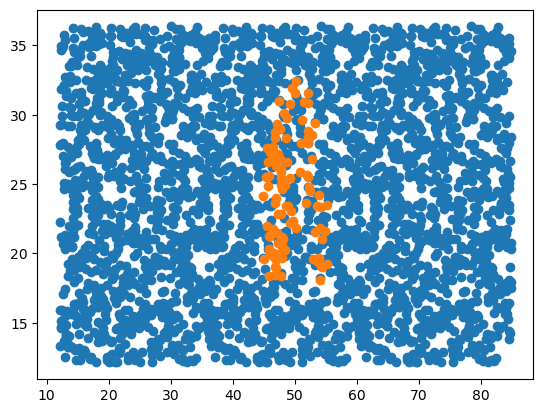

In [33]:
plt.plot(h2o.atoms.positions.T[0], h2o.atoms.positions.T[2], 'o')
plt.plot(peg.atoms.positions.T[0], peg.atoms.positions.T[2], 'o')

/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt


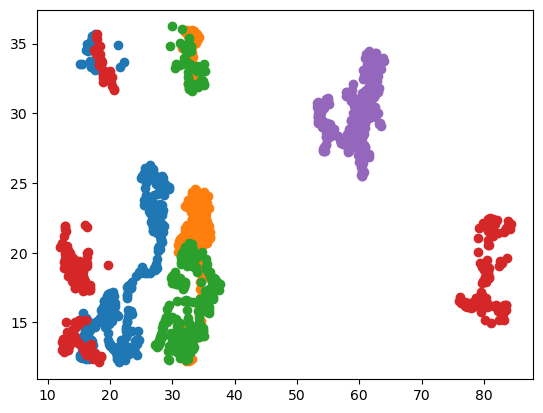

In [50]:
for i in np.unique(h2o.residues.resids)[:5]:
    mol1 = u.select_atoms("resid " + str(i))
    com_vs_time = []
    for ts in u.trajectory:
        com_vs_time.append(mol1.atoms.center_of_mass())
    com_vs_time = np.array(com_vs_time)
    plt.plot(com_vs_time.T[0], com_vs_time.T[2], 'o')

In [96]:
bonds = HBA(universe=u, hydrogens_sel='type 9', acceptors_sel='type 1 6 7')
bonds.run()

/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/coordinates/LAMMPS.py:598: UserWarning: Reader has no dt information, set to 1.0 ps
  ts.data['time'] = step_num * ts.dt
/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:765: UserWarning: No hydrogen bonds were found given angle of 150 between Donor, None, and Acceptor, type 1 6 7.
  warnings.warn(
/home/simon/.local/lib/python3.11/site-packages/MDAnalysis/analysis/hydrogenbonds/hbond_analysis.py:733: UserWarning: No hydrogen bonds were found given d-a cutoff of 3.0 between Donor, None, and Acceptor, type 1 6 7.
  warnings.warn(


In [79]:
all_times = H2O_PEG.results["hbonds"][:, 0]
bonds_each_frame = []
for time in all_times:
    bond_H2O_PEG_per_frame = np.sum(H2O_PEG.results["hbonds"][:, 0] == time)
    bond_PEG_H2O_per_frame = np.sum(PEG_H2O.results["hbonds"][:, 0] == time)
    bonds_each_frame.append([bond_H2O_PEG_per_frame, bond_PEG_H2O_per_frame])
bonds_each_frame = np.array(bonds_each_frame)

In [95]:
bond_histogram[0]

array([117,   0,   0, 118,   0,   0,  60,   0,   0,  12])

ValueError: x and y must have same first dimension, but have shapes (9,) and (10,)

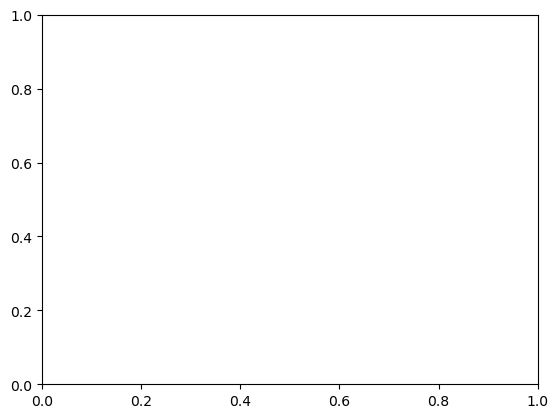

In [93]:
bond_histogram = np.histogram(bonds_each_frame.T[0])
N_bond = (bond_histogram[0][1:]+bond_histogram[0][:-1])/2
plt.plot(N_bond, bond_histogram[0])

In [91]:
N_bond

array([58.5,  0. , 59. , 59. ,  0. , 30. , 30. ,  0. ,  6. ])